In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import TransformerMixin
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import time
import json

In [2]:

data = pd.read_csv(r'../data/output/Main.csv')

In [3]:
data

,Unnamed: 0,InvoiceNo,Quantity,InvoiceDate,CustomerID,Country,model,Unit_Price,Manufacturer,Model,...,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Path
0,0,536365,6,2010-12-01,17850,United Kingdom,Integra,21.5,Acura,Integra,...,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,1.jpg
1,1,536384,3,2010-12-01,18074,United Kingdom,Integra,21.5,Acura,Integra,...,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,1.jpg
2,2,536398,4,2010-12-01,13448,United Kingdom,Integra,21.5,Acura,Integra,...,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,1.jpg
3,3,536408,4,2010-12-01,14307,United Kingdom,Integra,21.5,Acura,Integra,...,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,1.jpg
4,4,536412,1,2010-12-01,17920,United Kingdom,Integra,21.5,Acura,Integra,...,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,1.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400050,400050,580833,2,2011-12-06,16764,United Kingdom,S80,36.0,Volvo,S80,...,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655,10.jpg
400051,400051,580865,12,2011-12-06,17914,United Kingdom,S80,36.0,Volvo,S80,...,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655,10.jpg
400052,400052,580876,2,2011-12-06,14071,United Kingdom,S80,36.0,Volvo,S80,...,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655,10.jpg
400053,400053,580880,10,2011-12-06,14121,United Kingdom,S80,36.0,Volvo,S80,...,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655,10.jpg


In [4]:
data.values

array([[0, '536365', 6, ..., '2/2/2012', 58.28014952, '1.jpg'],
       [1, '536384', 3, ..., '2/2/2012', 58.28014952, '1.jpg'],
       [2, '536398', 4, ..., '2/2/2012', 58.28014952, '1.jpg'],
       ...,
       [400052, '580876', 2, ..., '11/14/2011', 85.73565451, '10.jpg'],
       [400053, '580880', 10, ..., '11/14/2011', 85.73565451, '10.jpg'],
       [400054, 'C580886', 1, ..., '11/14/2011', 85.73565451, '10.jpg']],
      dtype=object)

In [5]:
data.columns

Index(['Unnamed: 0', 'InvoiceNo', 'Quantity', 'InvoiceDate', 'CustomerID',
       'Country', 'model', 'Unit_Price', 'Manufacturer', 'Model',
       'Sales_in_thousands', '__year_resale_value', 'Vehicle_type',
       'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Latest_Launch', 'Power_perf_factor', 'Path'],
      dtype='object')

In [6]:
data.describe()

,Unnamed: 0,Quantity,CustomerID,Unit_Price,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,400055.000000,400055.000000,400055.000000,400055.000000,400055.000000,312301.000000,394893.000000,397474.000000,397474.000000,397474.000000,397474.000000,397474.000000,394893.000000,397474.000000,392312.000000,394893.000000
mean,200027.000000,8.259137,15287.077819,27.225290,53.823819,18.072975,27.361745,3.072727,186.058442,107.525974,71.177922,187.364935,3.381255,17.955195,23.855263,77.073397
std,115486.075308,8.199656,1713.466947,14.332719,68.079365,11.405976,14.390636,1.042680,56.869509,7.655360,3.449458,13.468087,0.631656,3.899356,4.295670,25.222952
min,0.000000,1.000000,12346.000000,9.230000,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,100013.500000,2.000000,13952.000000,17.800000,14.351000,11.260000,17.890000,2.300000,148.000000,103.000000,68.400000,177.500000,2.967000,15.800000,21.000000,60.087967
50%,200027.000000,5.000000,15152.000000,22.600000,30.696000,14.180000,22.695000,3.000000,177.500000,107.000000,70.550000,187.900000,3.368000,17.200000,24.000000,71.838039
75%,300040.500000,12.000000,16791.000000,31.900000,70.227000,19.875000,31.930000,3.800000,215.000000,112.200000,73.500000,196.200000,3.821000,19.800000,26.000000,89.427820
max,400054.000000,25.000000,18287.000000,85.500000,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400055 entries, 0 to 400054
Data columns (total 25 columns):
Unnamed: 0             400055 non-null int64
InvoiceNo              400055 non-null object
Quantity               400055 non-null int64
InvoiceDate            400055 non-null object
CustomerID             400055 non-null int64
Country                400055 non-null object
model                  400055 non-null object
Unit_Price             400055 non-null float64
Manufacturer           400055 non-null object
Model                  400055 non-null object
Sales_in_thousands     400055 non-null float64
__year_resale_value    312301 non-null float64
Vehicle_type           400055 non-null object
Price_in_thousands     394893 non-null float64
Engine_size            397474 non-null float64
Horsepower             397474 non-null float64
Wheelbase              397474 non-null float64
Width                  397474 non-null float64
Length                 397474 non-null float64
Curb_weig

In [8]:
data=data.dropna()

In [9]:
data.isnull().sum()

Unnamed: 0             0
InvoiceNo              0
Quantity               0
InvoiceDate            0
CustomerID             0
Country                0
model                  0
Unit_Price             0
Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
Path                   0
dtype: int64

In [10]:
df = data[['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Unit_Price', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor']]
#df2 = data.fillna(data.mean())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301977 entries, 0 to 381987
Data columns (total 16 columns):
Manufacturer           301977 non-null object
Model                  301977 non-null object
Sales_in_thousands     301977 non-null float64
__year_resale_value    301977 non-null float64
Vehicle_type           301977 non-null object
Unit_Price             301977 non-null float64
Engine_size            301977 non-null float64
Horsepower             301977 non-null float64
Wheelbase              301977 non-null float64
Width                  301977 non-null float64
Length                 301977 non-null float64
Curb_weight            301977 non-null float64
Fuel_capacity          301977 non-null float64
Fuel_efficiency        301977 non-null float64
Latest_Launch          301977 non-null object
Power_perf_factor      301977 non-null float64
dtypes: float64(12), object(4)
memory usage: 39.2+ MB


In [12]:
df.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Unit_Price             0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

#### We can see that there are some car models whose price is greater than 50k. We won't remove them instead we will use standardized scaling.

In [13]:
#Checking for duplicate values in the dataframe
df.loc[df.duplicated()]

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Unit_Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
1,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
2,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
3,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
4,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
5,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381983,Volkswagen,GTI,5.596,13.76,Passenger,17.5,2.0,115.0,98.9,68.3,163.3,2.762,14.6,26.0,4/1/2011,47.946841
381984,Volkswagen,GTI,5.596,13.76,Passenger,17.5,2.0,115.0,98.9,68.3,163.3,2.762,14.6,26.0,4/1/2011,47.946841
381985,Volkswagen,GTI,5.596,13.76,Passenger,17.5,2.0,115.0,98.9,68.3,163.3,2.762,14.6,26.0,4/1/2011,47.946841
381986,Volkswagen,GTI,5.596,13.76,Passenger,17.5,2.0,115.0,98.9,68.3,163.3,2.762,14.6,26.0,4/1/2011,47.946841


#### Now let us segregate between the categorical and numerical columns

In [14]:
cate_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(exclude=['datetime','object']).columns
df_cat = df[cate_cols]
df_num = df[num_cols]

#### It is observed that there isn't much difference in the average price of Passenger Vehicle_type and Car Vehicle_type

#Binning the Car Companies based on avg prices of each car Company.

df['Unit_Price'] = df['Unit_Price'].astype('int')
df_temp = df.copy()
t = df_temp.groupby(['Manufacturer'])['Unit_Price'].mean()
df_temp = df_temp.merge(t.reset_index(), how='left',on='Manufacturer')
bins = [0,10,30,50]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
df['Cars_Category'] = pd.cut(df_temp['Unit_Price_y'],bins,right=False,labels=label)
df.head()

In [15]:
sig_col = ['Unit_Price','__year_resale_value', 'Engine_size', 'Length','Width', 'Wheelbase','Horsepower', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']

#### After performing some basic visualizations, we observed that Power_perf_factor, curb_weight, horsepower, engine_size, year_release_value, fuel-efficiency are significant features with respect to Price_in_thousands variable.

In [16]:
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Unit_Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
2,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
3,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
4,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381983,Volkswagen,GTI,5.596,13.76,Passenger,17.5,2.0,115.0,98.9,68.3,163.3,2.762,14.6,26.0,4/1/2011,47.946841
381984,Volkswagen,GTI,5.596,13.76,Passenger,17.5,2.0,115.0,98.9,68.3,163.3,2.762,14.6,26.0,4/1/2011,47.946841
381985,Volkswagen,GTI,5.596,13.76,Passenger,17.5,2.0,115.0,98.9,68.3,163.3,2.762,14.6,26.0,4/1/2011,47.946841
381986,Volkswagen,GTI,5.596,13.76,Passenger,17.5,2.0,115.0,98.9,68.3,163.3,2.762,14.6,26.0,4/1/2011,47.946841


In [17]:
sig_cat_col = ['Manufacturer', 'Vehicle_type']

In [18]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'

dummies = pd.get_dummies(df[sig_cat_col], drop_first=True)
dummies.shape

(301977, 26)

In [19]:
df = pd.concat([df, dummies], axis = 1)

In [20]:
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Unit_Price,Engine_size,Horsepower,Wheelbase,Width,...,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Oldsmobile,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saturn,Manufacturer_Toyota,Manufacturer_Volkswagen,Vehicle_type_Passenger
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,...,0,0,0,0,0,0,0,0,0,1
1,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,...,0,0,0,0,0,0,0,0,0,1
2,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,...,0,0,0,0,0,0,0,0,0,1
3,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,...,0,0,0,0,0,0,0,0,0,1
4,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140.0,101.2,67.3,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381983,Volkswagen,GTI,5.596,13.76,Passenger,17.5,2.0,115.0,98.9,68.3,...,0,0,0,0,0,0,0,0,1,1
381984,Volkswagen,GTI,5.596,13.76,Passenger,17.5,2.0,115.0,98.9,68.3,...,0,0,0,0,0,0,0,0,1,1
381985,Volkswagen,GTI,5.596,13.76,Passenger,17.5,2.0,115.0,98.9,68.3,...,0,0,0,0,0,0,0,0,1,1
381986,Volkswagen,GTI,5.596,13.76,Passenger,17.5,2.0,115.0,98.9,68.3,...,0,0,0,0,0,0,0,0,1,1


#### Dealing with categorical variables, Creating Dummy Variables

In [21]:
#Dropping original category columns as dummies are created

df.drop( sig_cat_col, axis = 1, inplace = True)
df.shape

(301977, 40)

In [22]:
#Splitting data into train and test
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [23]:
df_train.head()

,Model,Sales_in_thousands,__year_resale_value,Unit_Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,...,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Oldsmobile,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saturn,Manufacturer_Toyota,Manufacturer_Volkswagen,Vehicle_type_Passenger
357308,Tacoma,84.087,9.575,11.5,2.4,142.0,103.3,66.5,178.7,2.580,...,0,0,0,0,0,0,0,1,0,0
78218,Concorde,31.148,13.725,22.2,2.7,200.0,113.0,74.4,209.1,3.452,...,0,0,0,0,0,0,0,0,0,1
51659,Malibu,135.126,11.225,16.5,3.1,170.0,107.0,69.4,190.4,3.051,...,0,0,0,0,0,0,0,0,0,1
77775,Concorde,31.148,13.725,22.2,2.7,200.0,113.0,74.4,209.1,3.452,...,0,0,0,0,0,0,0,0,0,1
112851,Ram Van,31.038,13.425,18.5,3.9,175.0,127.2,78.8,208.5,4.298,...,0,0,0,0,0,0,0,0,0,0


### Standardization

In [24]:
scaler = preprocessing.StandardScaler()

In [25]:
# Apply scaler() to all the columns except the 'dummy' variables
import warnings
warnings.filterwarnings("ignore")

df_train[sig_col] = scaler.fit_transform(df_train[sig_col])

In [26]:
df_train.head()

,Model,Sales_in_thousands,__year_resale_value,Unit_Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,...,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Oldsmobile,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saturn,Manufacturer_Toyota,Manufacturer_Volkswagen,Vehicle_type_Passenger
357308,Tacoma,84.087,-0.732396,-1.024359,-0.618606,-0.674203,-0.503811,-1.334040,-0.654042,-1.252452,...,0,0,0,0,0,0,0,1,0,0
78218,Concorde,31.148,-0.372410,-0.263790,-0.332909,0.322202,0.704133,0.910729,1.548067,0.212374,...,0,0,0,0,0,0,0,0,0,1
51659,Malibu,135.126,-0.589269,-0.668953,0.048021,-0.193180,-0.043049,-0.510011,0.193480,-0.461245,...,0,0,0,0,0,0,0,0,0,1
77775,Concorde,31.148,-0.372410,-0.263790,-0.332909,0.322202,0.704133,0.910729,1.548067,0.212374,...,0,0,0,0,0,0,0,0,0,1
112851,Ram Van,31.038,-0.398433,-0.526791,0.809881,-0.107283,2.472464,2.160980,1.504604,1.633524,...,0,0,0,0,0,0,0,0,0,0


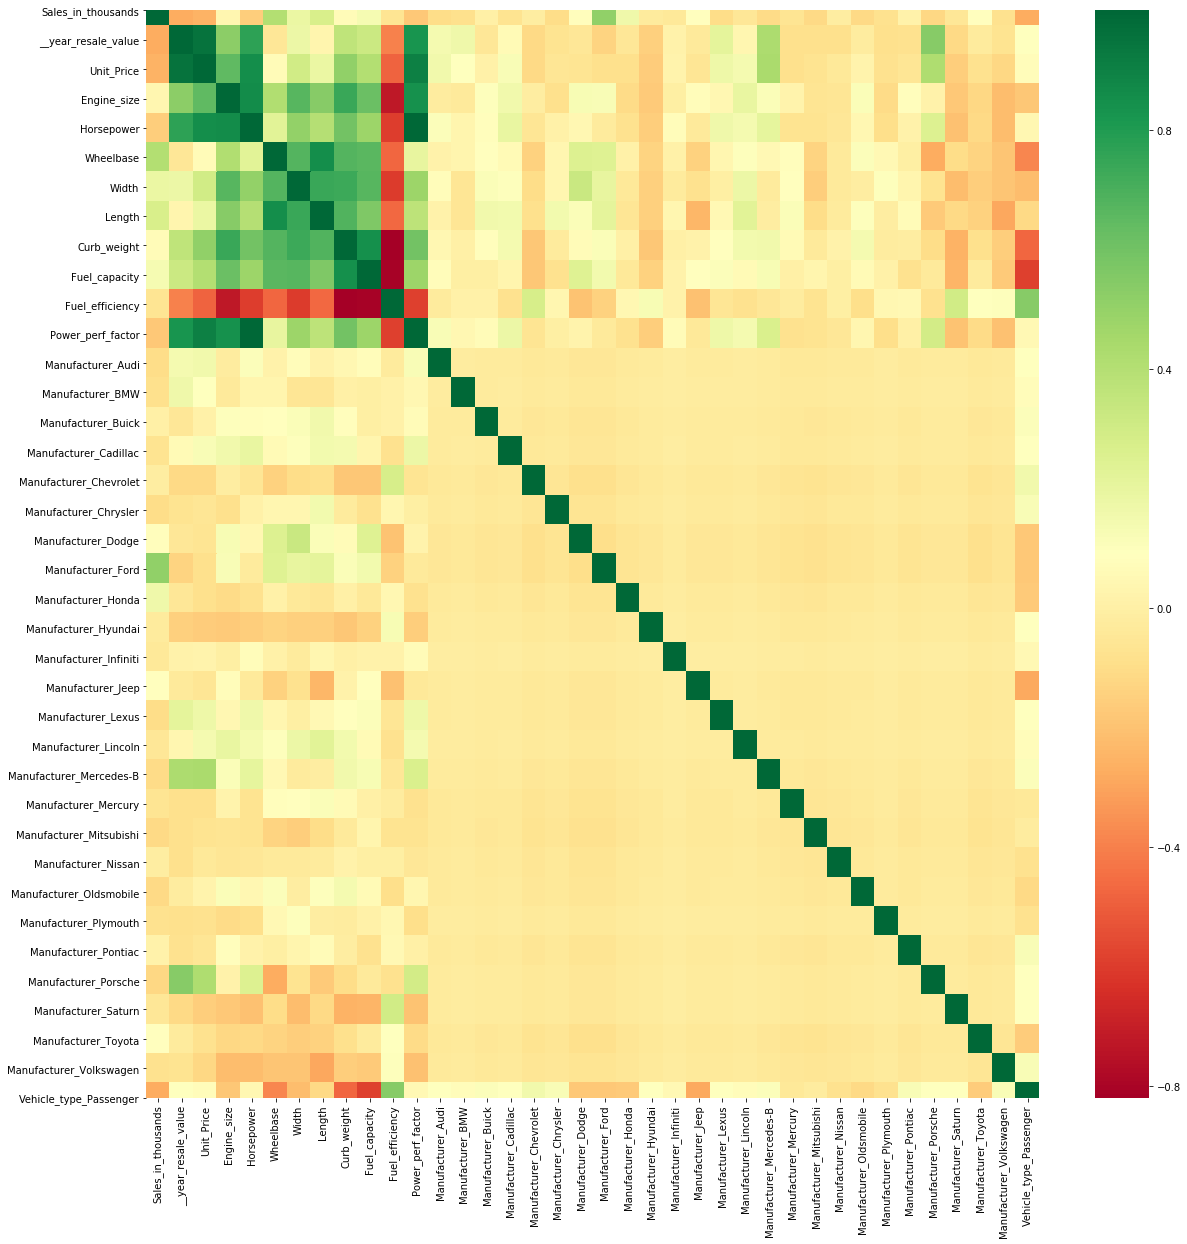

In [27]:
plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), cmap="RdYlGn")
plt.show()

In [28]:
y_train = df_train.pop('Unit_Price')
df_train.pop('Latest_Launch')
df_train.pop('Model')
X_train = df_train

In [29]:
#Bulding a linear model
X_train.columns

Index(['Sales_in_thousands', '__year_resale_value', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jeep', 'Manufacturer_Lexus', 'Manufacturer_Lincoln',
       'Manufacturer_Mercedes-B', 'Manufacturer_Mercury',
       'Manufacturer_Mitsubishi', 'Manufacturer_Nissan',
       'Manufacturer_Oldsmobile', 'Manufacturer_Plymouth',
       'Manufacturer_Pontiac', 'Manufacturer_Porsche', 'Manufacturer_Saturn',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen',
       'Vehicle_type_Passenger'],
      dtype='object')

### Recursive Feature Elimination

We perform this operation since we have too many independent variables

In [30]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 35)             
rfe = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Sales_in_thousands', False, 3),
 ('__year_resale_value', True, 1),
 ('Engine_size', True, 1),
 ('Horsepower', True, 1),
 ('Wheelbase', False, 2),
 ('Width', True, 1),
 ('Length', True, 1),
 ('Curb_weight', True, 1),
 ('Fuel_capacity', True, 1),
 ('Fuel_efficiency', True, 1),
 ('Power_perf_factor', True, 1),
 ('Manufacturer_Audi', True, 1),
 ('Manufacturer_BMW', True, 1),
 ('Manufacturer_Buick', True, 1),
 ('Manufacturer_Cadillac', True, 1),
 ('Manufacturer_Chevrolet', True, 1),
 ('Manufacturer_Chrysler', True, 1),
 ('Manufacturer_Dodge', True, 1),
 ('Manufacturer_Ford', True, 1),
 ('Manufacturer_Honda', True, 1),
 ('Manufacturer_Hyundai', True, 1),
 ('Manufacturer_Infiniti', True, 1),
 ('Manufacturer_Jeep', True, 1),
 ('Manufacturer_Lexus', True, 1),
 ('Manufacturer_Lincoln', True, 1),
 ('Manufacturer_Mercedes-B', True, 1),
 ('Manufacturer_Mercury', True, 1),
 ('Manufacturer_Mitsubishi', True, 1),
 ('Manufacturer_Nissan', True, 1),
 ('Manufacturer_Oldsmobile', True, 1),
 ('Manufactu

In [32]:
# Selecting the variables which are in support

col_sup = X_train.columns[rfe.support_]
col_sup

Index(['__year_resale_value', 'Engine_size', 'Horsepower', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jeep', 'Manufacturer_Lexus', 'Manufacturer_Lincoln',
       'Manufacturer_Mercedes-B', 'Manufacturer_Mercury',
       'Manufacturer_Mitsubishi', 'Manufacturer_Nissan',
       'Manufacturer_Oldsmobile', 'Manufacturer_Plymouth',
       'Manufacturer_Pontiac', 'Manufacturer_Porsche', 'Manufacturer_Saturn',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen',
       'Vehicle_type_Passenger'],
      dtype='object')

In [33]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col_sup]

In [34]:
# Adding a constant variable and Build a first fitted model
import statsmodels.api as sm  

#X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfe).fit()

#Summary of linear model
print(lm_rfe.summary())

                                 OLS Regression Results                                
Dep. Variable:             Unit_Price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.952e+09
Date:                Thu, 23 Apr 2020   Prob (F-statistic):                        0.00
Time:                        19:02:52   Log-Likelihood:                      1.0409e+06
No. Observations:              211383   AIC:                                 -2.082e+06
Df Residuals:                  211348   BIC:                                 -2.081e+06
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

#### Looking at the p-value of some of the features it is understood that some of the features with high p-values(>0.05) can be eliminated 

### Checking for multicolinearity using VIF: 

In [35]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Power_perf_factor,973.22
3,Horsepower,707.45
1,__year_resale_value,49.51
2,Engine_size,18.75
36,Vehicle_type_Passenger,14.26
7,Curb_weight,13.84
6,Length,12.69
4,Wheelbase,10.89
9,Fuel_efficiency,7.89
8,Fuel_capacity,7.18


### Dropping columns to finetune the model


In [36]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe1 = X_train_rfe[['__year_resale_value','Horsepower','Curb_weight','Length','Width','Fuel_capacity','Fuel_efficiency','Power_perf_factor']]
#X_train_rfe1 = X_train_rfe.drop(['Cars_Category_Medium_Range','Power_perf_factor'], 1,)

# Adding a constant variable and Build a second fitted model

#X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1).fit()

#Summary of linear model
print(lm_rfe1.summary())

                                 OLS Regression Results                                
Dep. Variable:             Unit_Price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.585e+07
Date:                Thu, 23 Apr 2020   Prob (F-statistic):                        0.00
Time:                        19:03:13   Log-Likelihood:                      5.4165e+05
No. Observations:              211383   AIC:                                 -1.083e+06
Df Residuals:                  211375   BIC:                                 -1.083e+06
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [37]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Power_perf_factor,552.20
1,Horsepower,410.32
0,__year_resale_value,17.49
2,Curb_weight,8.35
5,Fuel_capacity,4.75
6,Fuel_efficiency,4.29
4,Width,3.17
3,Length,3.08


In [38]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe2 = X_train_rfe1[['__year_resale_value','Horsepower','Curb_weight','Fuel_capacity','Fuel_efficiency','Width','Length']]

#X_train_rfe2 = X_train_rfe1.drop([], 1,)

# Adding a constant variable and Build a second fitted model

#X_train_rfe8c = sm.add_constant(X_train_rfe2)
lm_rfe8 = sm.OLS(y_train, X_train_rfe2).fit()

#Summary of linear model
print(lm_rfe8.summary())

                                 OLS Regression Results                                
Dep. Variable:             Unit_Price   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                          7.262e+05
Date:                Thu, 23 Apr 2020   Prob (F-statistic):                        0.00
Time:                        19:03:13   Log-Likelihood:                          40475.
No. Observations:              211383   AIC:                                 -8.094e+04
Df Residuals:                  211376   BIC:                                 -8.086e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [39]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Curb_weight,6.37
1,Horsepower,4.74
3,Fuel_capacity,4.58
4,Fuel_efficiency,4.14
0,__year_resale_value,3.58
5,Width,3.14
6,Length,3.08


#### Now the VIFs and p-values both are within an acceptable range. So we can go ahead and make our predictions using model lm_rfe8 and lm_rfe10

#### Model 1


In [40]:
#Apply scaling 
import warnings
warnings.filterwarnings("ignore")

df_test[sig_col] = scaler.transform(df_test[sig_col])
df_test.shape

(90594, 40)

In [41]:
y_test = df_test.pop('Unit_Price')
df_test.pop('Latest_Launch')
df_test.pop('Model')

X_test = df_test

In [42]:
X_train_rfe2

,__year_resale_value,Horsepower,Curb_weight,Fuel_capacity,Fuel_efficiency,Width,Length
357308,-0.732396,-0.674203,-1.252452,-0.718802,-0.253137,-1.334040,-0.654042
78218,-0.372410,0.322202,0.212374,-0.216809,0.430352,0.910729,1.548067
51659,-0.589269,-0.193180,-0.461245,-0.745223,0.202523,-0.510011,0.193480
77775,-0.372410,0.322202,0.212374,-0.216809,0.430352,0.910729,1.548067
112851,-0.398433,-0.107283,1.633524,3.746290,-1.847944,2.160980,1.504604
...,...,...,...,...,...,...,...
78520,-0.372410,0.322202,0.212374,-0.216809,0.430352,0.910729,1.548067
320905,2.015208,0.614252,-0.919843,-0.216809,-0.480966,-0.311108,-1.211813
249470,3.520209,2.074500,1.342911,0.866438,-0.936625,0.029870,-0.769943
66412,-0.771430,-1.052150,-1.558184,-1.220795,2.025160,-1.277211,-0.972768


In [43]:
#X_test_1 = sm.add_constant(X_test)

X_test_1c = X_test[X_train_rfe2.columns]

In [44]:
X_test_1c

,__year_resale_value,Horsepower,Curb_weight,Fuel_capacity,Fuel_efficiency,Width,Length
130052,-0.690759,-0.450871,0.071267,-0.481016,-0.025307,0.512922,0.715032
306845,-0.366771,-0.536768,-0.704822,-0.745223,0.658182,-0.794159,-0.422241
9315,1.015488,0.493996,0.880953,0.047397,-0.480966,0.058285,0.642594
245347,2.806743,1.610657,1.356349,1.421271,-0.708796,0.541336,1.113440
331615,-0.644351,-1.395737,-1.610260,-1.511422,2.025160,-1.362455,-0.559873
...,...,...,...,...,...,...,...
140877,-0.420119,-0.536768,0.731446,2.161050,-0.708796,1.535854,0.954077
178951,-0.368073,0.150408,-0.221027,0.575810,-0.936625,-0.510011,-1.465345
4897,0.161063,0.751687,0.321564,-0.163968,0.202523,-0.254278,0.374574
193213,1.939307,1.868348,0.948147,1.236327,-0.480966,0.228774,0.649838


In [45]:
# Making predictions using the final model
y_pred = lm_rfe8.predict(X_test_1c)

In [46]:
X_test_1c

,__year_resale_value,Horsepower,Curb_weight,Fuel_capacity,Fuel_efficiency,Width,Length
130052,-0.690759,-0.450871,0.071267,-0.481016,-0.025307,0.512922,0.715032
306845,-0.366771,-0.536768,-0.704822,-0.745223,0.658182,-0.794159,-0.422241
9315,1.015488,0.493996,0.880953,0.047397,-0.480966,0.058285,0.642594
245347,2.806743,1.610657,1.356349,1.421271,-0.708796,0.541336,1.113440
331615,-0.644351,-1.395737,-1.610260,-1.511422,2.025160,-1.362455,-0.559873
...,...,...,...,...,...,...,...
140877,-0.420119,-0.536768,0.731446,2.161050,-0.708796,1.535854,0.954077
178951,-0.368073,0.150408,-0.221027,0.575810,-0.936625,-0.510011,-1.465345
4897,0.161063,0.751687,0.321564,-0.163968,0.202523,-0.254278,0.374574
193213,1.939307,1.868348,0.948147,1.236327,-0.480966,0.228774,0.649838


### Model Evaluation

Text(0, 0.5, 'y_pred')

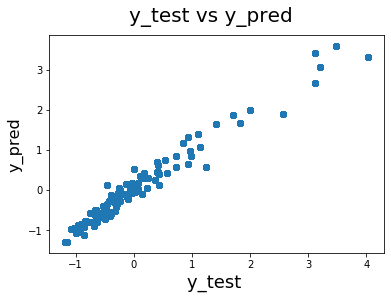

In [47]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)    

In [48]:
r2_score(y_test, y_pred)

0.960459250750856

#### The adjusted R-square on training is 87 and on test is 83 which is pretty close.

In [4]:
import pickle

In [52]:
pickle.dump(lm_rfe8, open('../pickle/pricing_model.pkl','wb'))

In [5]:
model = pickle.load(open('../pickle/pricing_model.pkl','rb'))

In [6]:
print(model.predict([[16, 300, 4, 26, 17, 30, 1]]))

[73.87108666]
